In [1]:
#Compare convective parameters from BARPA (forced with ERAI) with BARRA

#NOTE also check ERA5

import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from dask.diagnostics import ProgressBar
from distributed import Client
from barpa_read import drop_duplicates
import matplotlib as mpl

In [2]:
start_lat = -44; end_lat = -10; start_lon = 130; end_lon = 156
m = Basemap(llcrnrlon = start_lon, llcrnrlat = start_lat, urcrnrlon = end_lon, \
    urcrnrlat = end_lat, projection="cyl", resolution = "l")

In [3]:
def load(v):
    f = xr.open_mfdataset("/g/data/eg3/ab4502/ExtremeWind/aus/threshold_data/barpa_erai_"+v+"_6hr_mean.nc", combine="by_coords")
    e = xr.open_mfdataset("/g/data/eg3/ab4502/ExtremeWind/aus/threshold_data/era5_"+v+"_6hr_mean.nc", combine="by_coords")
    ei = xr.open_mfdataset("/g/data/eg3/ab4502/ExtremeWind/aus/threshold_data/erai_"+v+"_6hr_mean.nc", combine="by_coords")
    return [f,e,ei]

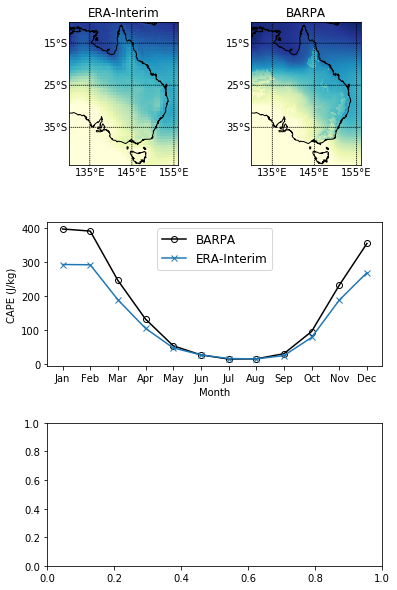

In [6]:
f, e, ei = load("ml_cape")

plt.figure(figsize=[6,10])

vmin=10; vmax=1000; t=slice("1990-01-01 00:00", "2015-12-31 18:00"); v="ml_cape"
plt.subplot2grid((3,2), (0,0), rowspan=1, colspan=1)
plt.title("ERA-Interim")
ei.sel({"time":t})[v].mean("time").plot(norm=mpl.colors.SymLogNorm(1, vmin=vmin, vmax=vmax), robust=True, add_colorbar=False, add_labels=False, cmap=plt.get_cmap("YlGnBu"))
m.drawcoastlines(); m.drawparallels([-45,-35,-25,-15], labels=[1,0,0,0]); m.drawmeridians([115,125,135,145,155,165], labels=[0,0,0,1])

plt.subplot2grid((3,2), (0,1), rowspan=1, colspan=1)
plt.title("BARPA")
c=f.sel({"time":t})[v].mean("time").plot(norm=mpl.colors.SymLogNorm(1, vmin=vmin, vmax=vmax), robust=True, add_colorbar=False, add_labels=False, cmap=plt.get_cmap("YlGnBu"))
m.drawcoastlines(); m.drawparallels([-45,-35,-25,-15], labels=[1,0,0,0]); m.drawmeridians([115,125,135,145,155,165], labels=[0,0,0,1])
cax=plt.axes([0.33, 0.5, 0.33, 0.02])
cb=plt.colorbar(c, cax=cax, orientation="horizontal")
cb.set_label("CAPE (J/kg)")

plt.subplot2grid((3,2), (1,0), rowspan=1, colspan=2)
f[v].sel({"time":t}).groupby("time.month").mean(dim=xr.ALL_DIMS).plot(label="BARPA", marker="o", color="k", mfc="none")    
ei[v].sel({"time":t}).interp({"lat":f.lat, "lon":f.lon}).groupby("time.month").mean(dim=xr.ALL_DIMS).plot(label="ERA-Interim", marker="x", color="tab:blue")  
plt.legend(fontsize=12)
plt.ylabel("CAPE (J/kg)")
plt.xlabel("Month")
plt.gca().set_xticks(np.arange(1,13))
plt.gca().set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

plt.subplot2grid((3,2), (2,0), rowspan=1, colspan=2)


plt.subplots_adjust(hspace=0.4)
plt.savefig("/g/data/eg3/ab4502/figs/barpa/erai_compare_cape.png", bbox_inches="tight")